# CNN 구현 실습

### CIFAR10 데이터셋 이용해서 CNN 구현해보기
- tensorflow 이용

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.datasets import cifar10

In [2]:
# 전체 6만개 데이터 / 5만개 : training data, 1만개 : test data

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
print('train dataset shape : ', train_images.shape, train_labels.shape)
print('test dataset shape : ', test_images.shape, test_labels.shape)

train dataset shape :  (50000, 32, 32, 3) (50000, 1)
test dataset shape :  (10000, 32, 32, 3) (10000, 1)


In [3]:
train_images[0, :, :, :], train_labels[0, :]

(array([[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],
 
        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],
 
        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],
 
        ...,
 
        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],
 
        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],
 
        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
  

In [4]:
NAMES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])
print(train_labels[:10])

[[6]
 [9]
 [9]
 [4]
 [1]
 [1]
 [2]
 [7]
 [8]
 [3]]


### CIFAR10 데이터
- 32x32 RGB 이미지
- 전반적으로 label에 해당하는 대상이 이미지의 중앙에 있고, Label대상 오브젝트 위주로 이미지가 구성. (정제가 깔끔하게 되어있다.)

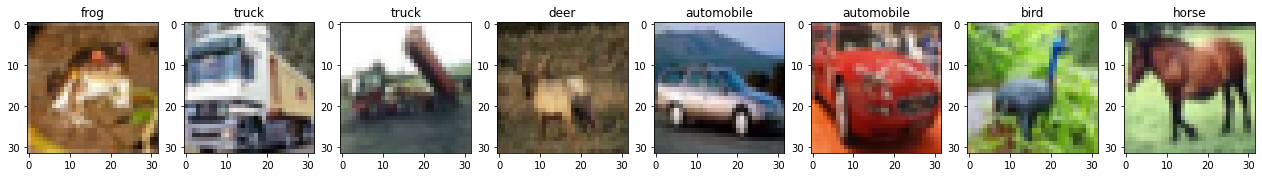

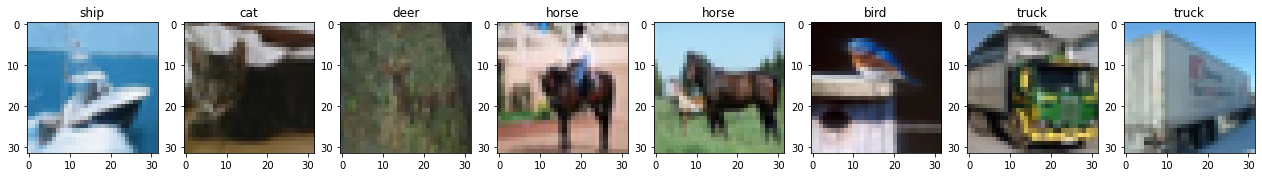

In [5]:
%matplotlib inline

# 이미지 출력 함수 만들기
def show_images(images, labels, ncols=8):
    figure, axs = plt.subplots(figsize=(22,6), nrows=1, ncols=ncols)
    for i in range(ncols):
        axs[i].imshow(images[i])
        label = labels[i].squeeze()
        axs[i].set_title(NAMES[int(label)])
        
show_images(train_images[:8], train_labels[:8], ncols=8)
show_images(train_images[8:16], train_labels[8:16], ncols=8)

#### reshape, squeeze, expand_dims

1. reshape은 원하는 shape를 직접 입력하여 바꿀 수 있다.\
    특히 shape에 -1를 입력하면 고정된 차원은 우선 채우고 남은 부분을 알아서 채워준다.

2) squeeze는 차원 중 사이즈가 1인 것을 찾아 스칼라값으로 바꿔 해당 차원을 제거한다.

3) expand_dims는 axis로 지정된 차원을 추가한다.

### Data preprocessing
- image array의 0 ~ 255 사이의 값으로 되어 있는 pixel intensity 값을 0 ~ 1 사이 값으로 변환, 정수값 pixel 값을 255.0으로 나눈다.
- label array는 숫자형 값으로 바꾸되, 원-핫 인코딩을 적용할지 선택. 일반적으로 원-핫 인코딩을 적용하는게 Keras Framework 활용이 용이
- image array, label array 모두 float32 형으로 변환. numpy의 float32는 tensor 변환시, tf.float32로 변환되며 기본적으로 Tensorflow backend Keras는 tf.float32를 기반으로 함


#### 1. 원-핫 인코딩을 적용하지 않았을 때, Loss function을 sparse categorical creossentropy로 적용

In [6]:
#  1. 원-핫 인코딩을 적용하지 않았을 때, Loss function을 sparse categorical creossentropy로 적용
def get_preprocessed_data(images, labels):
    
    # 학습과 테스트 이미지 array를 0~1 사이값으로 scale 및 float32형 변형
    images = np.array(images/255.0, dtype=np.float32)
    labels = np.array(labels, dtype=np.float32)
    
    return images, labels

train_images, train_labels = get_preprocessed_data(train_images, train_labels)
test_images, test_labels = get_preprocessed_data(test_images, test_labels)

In [7]:
train_images[0,:,:,:]

array([[[0.23137255, 0.24313726, 0.24705882],
        [0.16862746, 0.18039216, 0.1764706 ],
        [0.19607843, 0.1882353 , 0.16862746],
        ...,
        [0.61960787, 0.5176471 , 0.42352942],
        [0.59607846, 0.49019608, 0.4       ],
        [0.5803922 , 0.4862745 , 0.40392157]],

       [[0.0627451 , 0.07843138, 0.07843138],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509805, 0.21568628],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117648, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215687, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941177, 0.19607843],
        [0.47058824, 0.32941177, 0.19607843],
        [0.42745098, 0.28627452, 0.16470589]],

       ...,

       [[0.8156863 , 0.6666667 , 0.3764706 ],
        [0.7882353 , 0.6       , 0.13333334],
        [0.7764706 , 0

In [8]:
# Keras는 CNN(정확히 CNN 2D) 모델에 학습 데이터를 입력할 시 반드시 image array는 4차원 배열이 되어야 함
# RGB 채널 이미지 array는 기본적으로 3차원. 여기에 이미지의 개수를 포함하므로 4차원이 됨.
# 만일 GrayScale 2차원 이미지 array라도 의도적으로 채널을 명시해서 3차원으로 만들어 주고, 여기에 이미지 개수를 포함해서 4차원으로 만들어야 함

print(train_images.shape, train_labels.shape)

(50000, 32, 32, 3) (50000, 1)


In [9]:
# label 데이터가 2차원임. 이를 Keras 모델에 입력해도 별 문제없이 동작하지만, label의 경우는 ohe적용이 안되었는지를 알 수 있게 명확하게 1차원으로 표현해 주는 것이 좋암.
# 2차원인 labels 데이터를 1차원으로 변경
train_labels = train_labels.squeeze()
test_labels = test_labels.squeeze()


### 모델 생성

- CNN 모델의 맨처음 Layer는 Input layer, Input layer의 shape를 이미지 사이즈와 RGB 3채널에 맞게 (32, 32, 3)으로 설정
- Conv 연산을 연달아 적용하고 MaxPooling을 적용하는 루틴으로 모델 생성. MaxPooling을 적용 후에는 필터 개수를 더욱 증가 시킴
- MaxPooling 적용 후에는 출력 피처맵의 사이즈는 작아지되, 채널(깊이)는 늘어나는 형태로 모델 생성
- CIFAR10의 label수가 10개이므로 Classification을 위한 맨 마지막 Dense Layer의 units 개수가 10개임
- label 값이 원-핫 인코딩이 되지 않았기 때문에 model.compile()에서 loss는 반드시 sparse_categorical_crossentropy여야 함
- 만일 label 값이 원-핫 인코딩 되었다면 loss는 categorical_crossentropy임

In [10]:
IMAGE_SIZE = 32

In [11]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Conv2D, Dropout, Flatten, Activation, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler

input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

# x = Conv2D(filters=32, kernel_size=(5,5), padding='valid', activation='relu')(input_tensor)
x = Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu')(input_tensor)
x = Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu')(x)
x = MaxPooling2D(pool_size=(2,2))(x)

x = Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')(x)
x = Conv2D(filters=64, kernel_size=3, padding='same')(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=2)(x)

x = Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu')(x)
x = Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu')(x)
x = MaxPooling2D(pool_size=2)(x)

# cifar10의 클래스가 10개 이므로 마지막 classification의 Dense layer units의 개수는 10
x = Flatten(name='flatten')(x)
x = Dropout(rate=0.5)(x)
x = Dense(300, activation='relu', name='fc1')(x)
x = Dropout(rate=0.3)(x)
output = Dense(10, activation='softmax', name='output')(x)
model = Model(inputs=input_tensor, outputs=output)

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
activation (Activation)      (None, 16, 16, 64)        0     

In [12]:
# optimizer는 Adam으로 설정하고, label값이 원-핫 인코딩이 아니므로 loss는 sparse_categorical_crossentropy임
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### 모델 학습 및 테스트

- Model의 fit() 메소드를 호출하여 학습
- fit()은 학습 데이터가 Numpy array 자체로 들어올 때, Generator 형태로 들어올 때 약간의 수행 로직 차이가 있음
- 인자로 x에는 학습 image data, y는 학습 label 데이터
- batch_size는 한번에 가져올 image/label array의 개수, 1개씩 가져오면 수행속도가 너무 느리고, 전체를 가져오면 GPU Memory 부족이 발생할 수 있으므로 적절한 batch_size 설정이 필요\
만약 학습 데이터가 generator일 경우, fit()에서 batch_size를 설정하지 않음
- epochs는 전체 학습 데이터 학습을 반복 수행할 횟수
- step_per_epoch는 전체 학습 데이터를 몇번 배치 작업으로 수행하는가를 의미, 보통 입력데이터가 generator일 경우 설정
- validation_data는 검증용 데이터 세트
- validation_steps는 검증용 데이터의 steps_per_epoch임
- validation_split는 validation_data로 별도의 검증용 데이터 세트를 설정하지 않고 자동으로 학습용 데이터에서 검증용 데이터 세트 분할

In [13]:
history = model.fit(x=train_images, y=train_labels, batch_size=64, epochs=30, validation_split=0.15)
# validation_split=0.15 : 학습데이터의 15퍼센트를 검증 데이터로 쓰겠다.

Epoch 1/30
665/665 [==============================] - 8s 8ms/step - loss: 1.6453 - accuracy: 0.3899 - val_loss: 1.2748 - val_accuracy: 0.5319
Epoch 2/30
665/665 [==============================] - 5s 7ms/step - loss: 1.2102 - accuracy: 0.5636 - val_loss: 1.1183 - val_accuracy: 0.5955
Epoch 3/30
665/665 [==============================] - 5s 7ms/step - loss: 1.0082 - accuracy: 0.6399 - val_loss: 0.8978 - val_accuracy: 0.6811
Epoch 4/30
665/665 [==============================] - 5s 7ms/step - loss: 0.8789 - accuracy: 0.6869 - val_loss: 0.8080 - val_accuracy: 0.7208
Epoch 5/30
665/665 [==============================] - 5s 7ms/step - loss: 0.7938 - accuracy: 0.7192 - val_loss: 0.7532 - val_accuracy: 0.7381
Epoch 6/30
665/665 [==============================] - 5s 7ms/step - loss: 0.7134 - accuracy: 0.7483 - val_loss: 0.7179 - val_accuracy: 0.7461
Epoch 7/30
665/665 [==============================] - 5s 7ms/step - loss: 0.6715 - accuracy: 0.7631 - val_loss: 0.6997 - val_accuracy: 0.7605
Epoch 

313/313 [==============================] - 1s 3ms/step - loss: 0.7456 - accuracy: 0.7903


[0.7456315159797668, 0.7903000116348267]

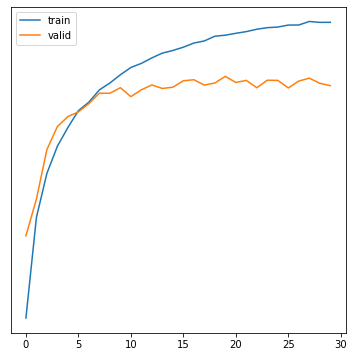

In [14]:
def show_history(history):
    plt.figure(figsize=(6,6))
    plt.yticks(np.arange(6,6))
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='valid')
    plt.legend()
    
show_history(history)

# 테스트 데이터로 성능 평가
model.evaluate(test_images, test_labels)

### model.predict를 통해 이미지 분류
- 4차원 이미지 배열을 입력해서 모델학습함. predict()시에도 4차원 이미지 배열을 입력해야함
- 학습 데이터의 원-핫 인코딩 적용 여부와 관계없이 softmax 적용 결과는 무조건 2차원임에 유의

In [15]:
# 아래 코드는 오류 발생. Conv2D를 사용한 모델에 4차원 이미지 배열을 입력해서 모델을 학습했으므로 predict() 시에도 테스트용 4차원 이미지 배열을 입력해야 함
pred = model.predict(test_images[0])

ValueError: in user code:

    C:\Users\JAY\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:1569 predict_function  *
        return step_function(self, iterator)
    C:\Users\JAY\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:1559 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\JAY\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\distribute\distribute_lib.py:1285 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\JAY\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\distribute\distribute_lib.py:2833 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\JAY\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\distribute\distribute_lib.py:3608 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\JAY\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:1552 run_step  **
        outputs = model.predict_step(data)
    C:\Users\JAY\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:1525 predict_step
        return self(x, training=False)
    C:\Users\JAY\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\base_layer.py:1013 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\Users\JAY\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\input_spec.py:267 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) +

    ValueError: Input 0 is incompatible with layer model: expected shape=(None, 32, 32, 3), found shape=(32, 32, 3)


In [16]:
# 테스트용 4차원 이미지 배열을 입력해서 predict()수행. 
# predict()의 결과는 softmax 적용 결과임. 학습 데이터의 원-핫 인코딩 적용 여부와 관계없이 softmax 적용 결과는 무조건 2차원 임에 유의 
preds = model.predict(np.expand_dims(test_images[0], axis=0)) # [32, 32, 3] -> [1, 32, 32, 3]
print('예측 결과 shape:', preds.shape)
print('예측 결과:', preds)

예측 결과 shape: (1, 10)
예측 결과: [[4.21240202e-06 3.02088461e-06 1.42401099e-04 4.17178661e-01
  3.09196148e-05 5.82477748e-01 4.08594169e-05 1.17048956e-04
  3.17002309e-06 1.96171572e-06]]


In [17]:
preds = model.predict(test_images[:32], batch_size=32)
print('예측 결과 shape:', preds.shape)
print('예측 결과:', preds)

예측 결과 shape: (32, 10)
예측 결과: [[4.2063130e-06 3.0209633e-06 1.4240370e-04 4.1726807e-01 3.0890915e-05
  5.8238846e-01 4.0812891e-05 1.1698737e-04 3.1695431e-06 1.9610297e-06]
 [5.9340487e-05 7.1413867e-02 3.1178192e-11 9.2457821e-12 1.4180286e-10
  3.4796598e-14 2.1649746e-11 5.3167272e-14 9.2827821e-01 2.4859287e-04]
 [1.4540254e-01 1.4745800e-02 2.3172295e-05 1.7000368e-04 6.4406076e-06
  1.9032474e-05 3.7212780e-05 2.3423407e-05 8.3473867e-01 4.8337327e-03]
 [5.3197396e-01 3.2095812e-02 3.3793913e-04 1.3071172e-04 5.0497769e-05
  1.1371591e-06 6.6538068e-06 2.0406903e-06 2.5774282e-01 1.7765845e-01]
 [7.9831963e-09 1.3649645e-05 9.5286977e-04 2.9128059e-04 1.4116347e-03
  2.1210069e-05 9.9730897e-01 3.1580386e-10 7.3655869e-08 3.2799392e-07]
 [6.4180603e-07 1.7772808e-06 2.9734746e-04 6.9680084e-03 1.9734190e-04
  1.0142889e-02 9.8236752e-01 2.9620978e-07 1.6841935e-06 2.2440330e-05]
 [3.8167755e-07 7.4180967e-01 1.5750829e-06 9.4218318e-05 1.1487815e-08
  1.1053905e-05 1.1426901e-06

In [18]:
predicted_class = np.argmax(preds, axis=1) # 10개 클래스에서 label 번호 뽑자.
print('예측 클래스 값:', predicted_class)

예측 클래스 값: [5 8 8 0 6 6 1 4 3 1 0 9 5 7 9 8 5 7 8 6 7 0 4 9 4 2 4 0 9 6 6 5]


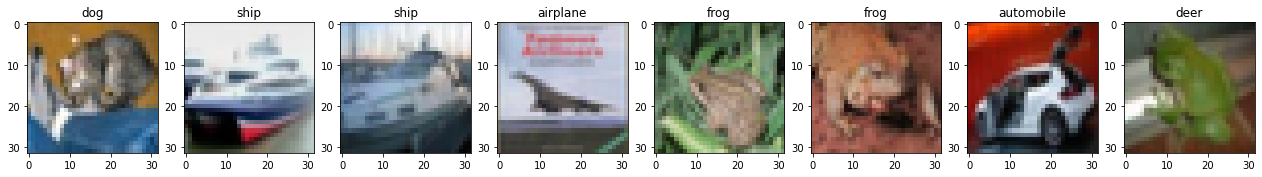

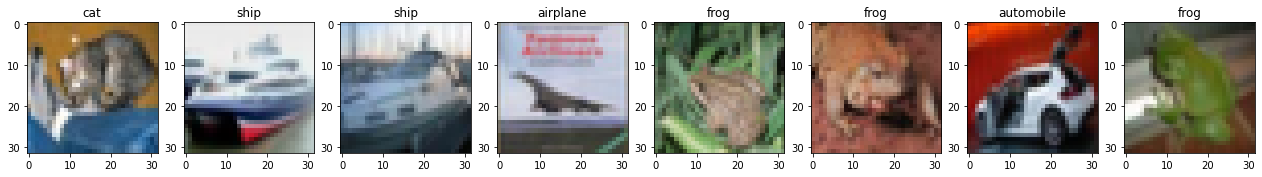

In [19]:
# 위의 사진이 예측값
show_images(test_images[:8], predicted_class[:8], ncols=8)
show_images(test_images[:8], test_labels[:8], ncols=8)
# 밑에 사진이 정답